In [1]:
f = [10,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,7000,10000,15000,17500,20000,22500,25000,30000]
v1 = [94,96,100,240,256,272,272,280,288,96,288,296,100,320,320,328,328,336,328,336]
v2 = [90,90,90,232,240,248,264,272,272,96,288,288,96,312,320,328,320,320,336,336]
R = [55,56,59,70,80,100,120,140,160,190,210,230,330,450,700,800,900,1000,1200,1400]
p = [0,0,32,50,60,63,72,73,73,73,77,79,86,86,90,90,85,83,90,83]

0.007424093147024313
()
Scipy.Curve_Fit Best Fit Line Chi Squared Test
------------------------------------------------------------------------
('Chi-square = ', 2404.9451305220455)
('Degrees of Freedom = ', 19)
('Reduced Chi Square = ', 126.57605950116029)
('Probability of exceeding this chi_square = ', 0.0)
('Confidence can we reject this model = ', 1.0)
()
Function LinFit Results
------------------------------------------------------------------------
Slope = 0.001735834238244889
intercept = 52.095299183002986
sigma_slope = 7.312012853521108e-05
sigma_intercept = 0.926025378104796
()
('Chi Square Test and Analysis for Linear Regression', 'Phase Difference')
------------------------------------------------------------------------
('Number of Data Points above Line of Best Fit = ', 12)
('Number of Data Points below Line of Best Fit = ', 8)
('Number of Data Points on the Line of Best Fit = ', 0)
------------------------------------------------------------------------
('Number of Data P

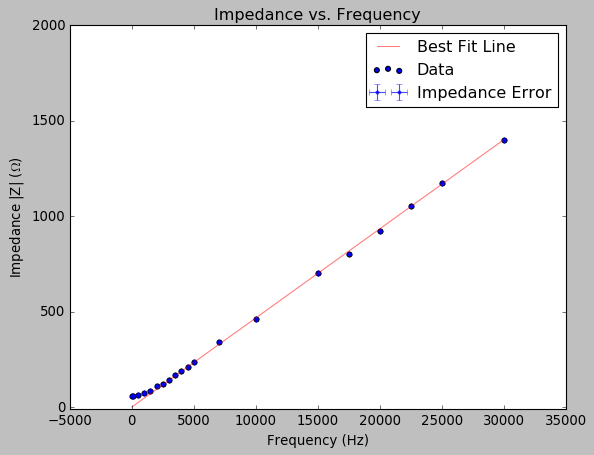

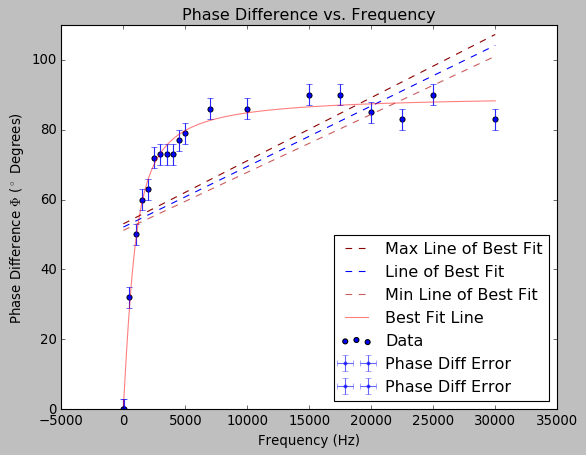

In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math as m
import numpy.random as ran
import scipy.optimize as opt
import scipy.stats as stat

# Function Definitions
def chi_squared(ydata, y_bestfit, sigma):
    cs = np.sum(((ydata - y_bestfit)**2)/(sigma**2))
    csr = cs / (len(ydata)-1)
    return (cs, csr)

def W(n, xdata, ydata, yerror):
    w_of_n = np.sum(((xdata**n)*ydata)/(yerror**2))
    return w_of_n

def U(n, xdata, yerror):
    u_of_n = np.sum((xdata**n)/(yerror**2))
    return u_of_n
    

def linfit(xdata, ydata, yerror):
    # output an array of four values in the form (slope, intercept, sigma_slope, sigma_intercept)
    # U_n = \sum [x_i^n divided by \sig_i ^ 2]
    # W_n - \sum [y_i x_i^n divided by \sig_i^2]
    # D = U_0 * U_2 - U_1\^2
    U_0 = U(0, xdata, yerror)
    U_1 = U(1, xdata, yerror)
    U_2 = U(2, xdata, yerror)
    W_0 = W(0, xdata, ydata, yerror)
    W_1 = W(1, xdata, ydata, yerror)
    
    D = U_0*U_2 - (U_1**2)
    slope = ((U_0*W_1) - (U_1*W_0))/D
    intercept = (U_2*W_0 - U_1*W_1)/D
    sigma_slope = (U_0/D)**0.5 # sigma_slope might be squared
    sigma_intercept = (U_2/D)**0.5 # intercept might be squared
    
    return np.array([slope, intercept, sigma_slope, sigma_intercept])

def dzdv1(R, V2):
   # The partial derivative of Z with respect to V1 
   # where Z = |V1|R/|V2|
   retn = R / V2
   return retn

def dzdv2(V1, R, V2):
   # Partial of Z with respect to V2
   retn = V1*R
   retn /= V2
   retn /= V2
   return retn

def dzdvr(V1, V2):
   # Partial of Z with respect to R
   retn = V1 / V2
   return retn

def sigz(R, V1, V2, sigV1, sigV2, sigR):
   # Uses the above function definitions to calculate the error range
   # for Z by using the derivative method
   retn = (dzdv1(R, V2)*sigV1)**2
   retn += (dzdv2(V1, R, V2)*sigV2)**2
   retn += (dzdvr(V1, V2)*sigR)**2
   return retn**0.5

def ImpGuessMagFunc(freq, *induct_guess):
   # This function returns the magnitude over a range of frequencies
   # provided a guess for what the inductance might be
   omega = m.pi*2*freq
   return (omega*induct_guess)

def ImpMag(V1, V2, R):
   # ImpMag reads as Impedence Magnitude, it is the
   # theoretical equation for calculating the magnitude of impedence
   return ((V1 * R)/V2)

def ImpLeastSquaresFit(xdata, ydata, y_sigma):
   induct_guess = 7.1e-3
   guess_params = np.array([induct_guess])
   xsmooth = np.linspace(np.min(xdata),np.max(xdata), 1000)
   fsmooth = ImpGuessMagFunc(xsmooth, *guess_params)
   #plt.plot(xsmooth, fsmooth, color='red',
   #         label='Manual Impedance Guess', alpha=0.9)
   popt, pcov = opt.curve_fit(ImpGuessMagFunc, xdata, ydata, sigma=y_sigma,
                              p0=guess_params, absolute_sigma=1)
   for elem in popt:
      print(elem)
   fsmooth_next = ImpGuessMagFunc(xsmooth, *popt)
   plt.plot(xsmooth, fsmooth_next, color='red',
            label='Best Fit Line', alpha=0.5)
   plt.legend(loc=1)
   
   # Chi Squared Test for Best Fit Line
   print()
   print(72*'=')
   print('Scipy.Curve_Fit Best Fit Line Chi Squared Test')
   print(72*'-')
   Mag_Fit = ImpGuessMagFunc(xdata, *popt)
   Chi_Squared = sum( (ydata - Mag_Fit)**2 / y_sigma**2)
   dof = len(ydata) - len(popt)
   Reduced_Chi_Squared = Chi_Squared / float(dof)
   print("Chi-square = ", Chi_Squared)
   print("Degrees of Freedom = ", dof)
   print("Reduced Chi Square = ", Reduced_Chi_Squared)

   print("Probability of exceeding this chi_square = ",
          1.-stat.chi2.cdf(Chi_Squared,dof))
 
   print("Confidence can we reject this model = ",
        stat.chi2.cdf(Chi_Squared,dof))
   print(72*'=')

def PhaseFitFunc(freq, *guess_params):
   omega = 2*m.pi*freq
   a = omega*guess_params
   a = np.arctan(a)
   a /= m.pi
   a *= 360
   a = (-.5*a)+180
   a = 180 - a
   return a

def PhaseLeastSquaresFit(xdata, ydata, y_sigma):
   # Least Squares Fit was originally a python program written by Prof.
   # David Smith, I have adapted and altered it to be generalized as an
   # individual function.
   induct_guess = 7.1e-3
   guess_params = np.array([induct_guess])
   xsmooth = np.linspace(np.min(xdata),np.max(xdata), 1000)
   fsmooth = PhaseFitFunc(xsmooth, *guess_params)
   #plt.plot(xsmooth, fsmooth, color='red',
   #         label='Manual phase Guess', alpha=0.9)
   popt, pcov = opt.curve_fit(PhaseFitFunc, xdata, ydata, sigma=y_sigma,
                              p0=guess_params, absolute_sigma=1)
   fsmooth_next = PhaseFitFunc(xsmooth, *popt)
   plt.plot(xsmooth, fsmooth_next, color='red',
            label='Best Fit Line', alpha=0.5)
   plt.legend(loc=3)
# def LeastSquaresFit(xdata, ydata, y_sigma):
#    # Least Squares Fit was originally a python program written by Prof.
#    # David Smith, adapted and altered it to be generalized as an
#    # individual function.
#    induct_guess = 7.1e-3
#    xsmooth = np.linspace(np.min(freq),np.max(freq), 1000)
#    fsmooth = InductMag(xsmooth, induct_guess)
#    plt.plot(xsmooth, fsmooth, color='red',
#             label='Line of Best Fit', alpha=0.9)

   
   # Chi Squared Test for Best Fit Line
   print()
   print(72*'=')
   print('Scipy.Curve_Fit Best Fit Line Chi Squared Test')
   print(72*'-')
   Mag_Fit = InductMag(xdata, induct_guess)
   Chi_Squared = sum( (ydata - Mag_Fit)**2 / y_sigma**2)
   dof = len(ydata) - 2
   Reduced_Chi_Squared = Chi_Squared / float(dof)
   print("Chi-square = ", Chi_Squared)
   print("Degrees of Freedom = ", dof)
   print("Reduced Chi Square = ", Reduced_Chi_Squared)

   print("Probability of exceeding this chi_square = ",
          1.-stat.chi2.cdf(Chi_Squared,dof))
 
   print("Confidence can we reject this model = ",
        stat.chi2.cdf(Chi_Squared,dof))
   print(72*'=')

# Input Data / Initalize variables
freq = np.array([
                 10,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,7000,10000,15000,17500,20000,22500,25000,30000
                ])

phase = np.array([
                  0,0,32,50,60,63,72,73,73,73,77,79,86,86,90,90,85,83,90,83
                ]) # conversion to radians

resist = np.array([
                   55,56,59,70,80,100,120,140,160,190,210,230,330,450,700,800,900,1000,1200,1400
                 ])

volt1 = np.array([
                  94,96,100,240,256,272,272,280,288,96,288,296,100,320,320,328,328,336,328,336
                ])

volt2 = np.array([
                  90,90,90,232,240,248,264,272,272,96,288,288,96,312,320,328,320,320,336,336
                ])

freq_sigma = np.ones(20)*5
phase_sigma = np.ones(20)*3
resist_sigma = np.ones(20)*2
volt1_sigma = np.ones(20)*.4
volt2_sigma = np.ones(20)*.4
# Graph for Impedance
# Calculate Z and Z_sigma
Z = ImpMag(volt1, volt2, resist)
Z_sigma = sigz(resist, volt1, volt2, volt1_sigma,volt2_sigma, resist_sigma)

# Plot Raw Data with Error Bars
plt.errorbar(freq, Z, xerr=freq_sigma, yerr=Z_sigma, color='blue',
             marker='.', linestyle='None', label="Impedance Error",alpha=0.7)
plt.scatter(freq,Z,label='Data')

plt.title("Impedance vs. Frequency")

plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance |Z| ($\Omega$)")

# Run Least Squares Fit to generate line of Best
plt.ylim(-10, 2000)
# plt.errorbar(freq, Z, xerr=freq_sigma*.08, yerr=Z_sigma*.08, color='blue',
#              marker='.', linestyle='None', label="Impedance",alpha=0.7)
ImpLeastSquaresFit(freq, Z, Z_sigma)
plt.savefig("ImpedanceBoxB.pdf")
# Graph For Phase Difference
# Create New Figure
plt.figure()

# Plot Raw Data with Error Bars
plt.errorbar(
             freq, phase, xerr=freq_sigma, yerr=phase_sigma,
             color='blue', marker='.', linestyle='None',
             label='Phase Diff Error', alpha=0.6
            )

plt.title("Phase Difference vs Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase Difference (Degrees)")
# run linfit
results = linfit(freq, phase, phase_sigma)
print()
print(72*"=")
print("Function LinFit Results")
print(72*"-")
print("Slope = "+ str(results[0]))
print("intercept = "+ str(results[1]))
print("sigma_slope = "+ str(results[2]))
print("sigma_intercept = "+ str(results[3]))
print(72*'=')

# Create a linear regression line of best fit based on results
xsmooth = np.linspace(np.min(freq),np.max(freq)+20000, 1000)
terrible_fit_max = freq*(results[0]+results[2])
terrible_fit_max += (results[1]+results[3])

terrible_fit = freq*results[0] + results[1]

terrible_fit_min = freq*(results[0]-results[2])
terrible_fit_min += (results[1]-results[3])

plt.plot(freq, terrible_fit_max, '--', color='darkred',
         label="Max Line of Best Fit")
plt.plot(freq, terrible_fit, '--', color='blue',
         label="Line of Best Fit")
plt.plot(freq, terrible_fit_min, '--', color='indianred',
         label="Min Line of Best Fit")
plt.legend(loc=4)
plt.ylim(0, 110)
plt.savefig("PhaseDiff.pdf")

# Chi Squared Test and Analysis for linear regression equation
above = 0
above_spread = 0
below = 0
below_spread = 0
equalTo = 0
in_spread = 0
for deg, guess in zip(phase, terrible_fit):
   if (deg > guess):
      above += 1
   elif (deg < guess):
      below += 1
   else:
      equalTo += 1

for deg, high, low, in zip(phase, terrible_fit_max, terrible_fit_min):
   if (deg <= high and deg >= low):
      in_spread += 1
   elif (deg < low):
      below_spread += 1
   else:
      above_spread += 1

Chi_Tup = chi_squared(phase, terrible_fit, phase_sigma)
print()
print(72*'=')
print(
      "Chi Square Test and Analysis for Linear Regression",
      "Phase Difference"
     )
print(72*'-')
print("Number of Data Points above Line of Best Fit = ", above)
print("Number of Data Points below Line of Best Fit = ", below)
print("Number of Data Points on the Line of Best Fit = ", equalTo)
print(72*'-')
print("Number of Data Points above the Spread = ", above_spread)
print("Number of Data Points below the Spread = ", below_spread)
print("Number of Data Points within the Spread = ", in_spread)
print(72*'-')
print('Chi Squared = ', Chi_Tup[0])
print('Reduced Chi Square = ', Chi_Tup[1])
print(72*'=')

plt.errorbar(
             freq, phase, xerr=freq_sigma, yerr=phase_sigma,
             color='blue', marker='.', linestyle='None',
             label='Phase Diff Error', alpha=0.6
            )

plt.scatter(freq,phase,label='Data')
plt.title("Phase Difference vs. Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase Difference $\Phi$ ($^\circ$ Degrees)")
PhaseLeastSquaresFit(freq, phase, phase_sigma)
plt.legend(loc=4)
plt.savefig("PhaseBoxB.pdf")